In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#theme for seaborn
sns.set(style="whitegrid")

# importing titanic data set
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# displaying the first few rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
#missing values
print("missing values\n",df.isnull().sum())

print("\ndata types\n",df.dtypes)

missing values
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

data types
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
#drop missing values
df = df.dropna()

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [12]:
basic_stats = df.describe()
print("Basic statistics:\n", basic_stats)

#median values for the numerical columns
median_values = df.median(numeric_only=True)
print("\nmedian values:\n", median_values)

Basic statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481   
std     247.052476    0.470725    0.515187   15.643866    0.644159   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.500000    0.000000    1.000000   24.000000    0.000000   
50%     457.000000    1.000000    1.000000   36.000000    0.000000   
75%     676.000000    1.000000    1.000000   47.500000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  183.000000  183.000000  
mean     0.475410   78.682469  
std      0.754617   76.347843  
min      0.000000    0.000000  
25%      0.000000   29.700000  
50%      0.000000   57.000000  
75%      1.000000   90.000000  
max      4.000000  512.329200  
median values:
 PassengerId    457.0
Survived         1.0
Pcla

In [21]:
#Mean Age and Fare by Passenger Class (Pclass)
mean_by_class = df.groupby('Pclass')[['Age', 'Fare']].mean()
print("Mean of Age and Fare grouoped by passenger class:\n", mean_by_class)

#mean Age and Fare by sex
mean_by_sex = df.groupby('Sex')[['Age', 'Fare']].mean()
print("\nMean Age and Fare by Sex:\n", mean_by_sex)

#combining Pclass and Sex
combined_mean = df.groupby(['Pclass', 'Sex'])[['Age', 'Fare']].mean()
print("\nMean Age and Fare by Pclass and Sex:\n", combined_mean)

# Key insights
print("\n==== Key Insights ===")
print("- 1st class passengers were older and paid the highest average fares")
print("- 3rd class passengers are younger and paid the lowest fares.")
print("- Women paid higher fares on average and are slightly younger")
print("- Median age of passengers is about {:.1f} years".format(df['Age'].median()))
print("- Median fare is {:.2f}".format(df['Fare'].median()))

Mean of Age and Fare grouoped by passenger class:
               Age       Fare
Pclass                      
1       37.591266  88.683228
2       25.266667  18.444447
3       21.000000  11.027500

Mean Age and Fare by Sex:
               Age       Fare
Sex                         
female  32.676136  89.000900
male    38.451789  69.124343

Mean Age and Fare by Pclass and Sex:
                      Age        Fare
Pclass Sex                          
1      female  34.094595  103.128209
       male    40.671667   75.957888
2      female  29.611111   14.865744
       male    18.750000   23.812500
3      female  17.200000   13.360000
       male    24.800000    8.695000

====Key Insights===
- 1st class passengers were older and paid the highest average fares
- 3rd class passengers are younger and paid the lowest fares.
- Women paid higher fares on average and are slightly younger
- Median age of passengers is about 36.0 years
- Median fare is 57.00


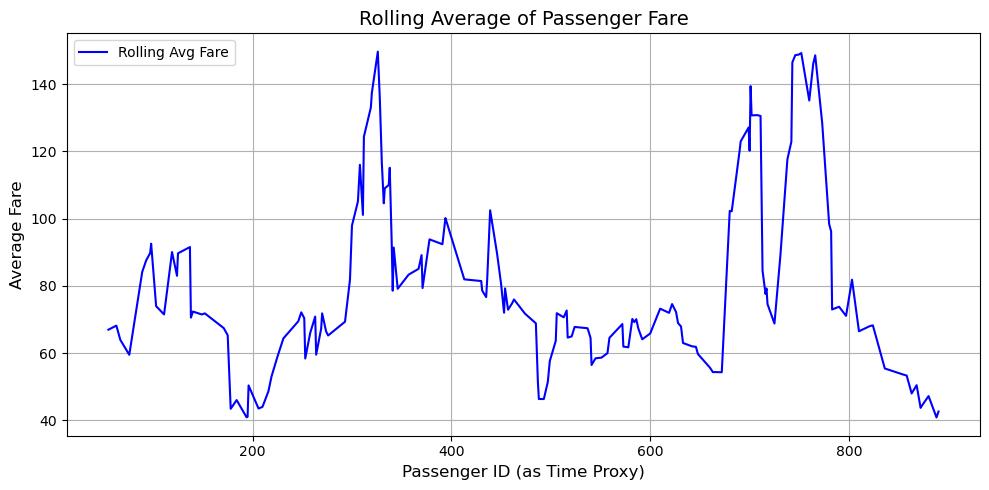

In [25]:
df_sorted = df.sort_values(by='PassengerId')
df_sorted['RollingFare'] = df_sorted['Fare'].rolling(window=10).mean()

#line Chart: simulate trend of average fare by passenger index
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['PassengerId'], df_sorted['RollingFare'], color='blue', label='Rolling Avg Fare')
plt.title('Rolling Average of Passenger Fare', fontsize=14)
plt.xlabel('Passenger ID (as Time Proxy)', fontsize=12)
plt.ylabel('Average Fare', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

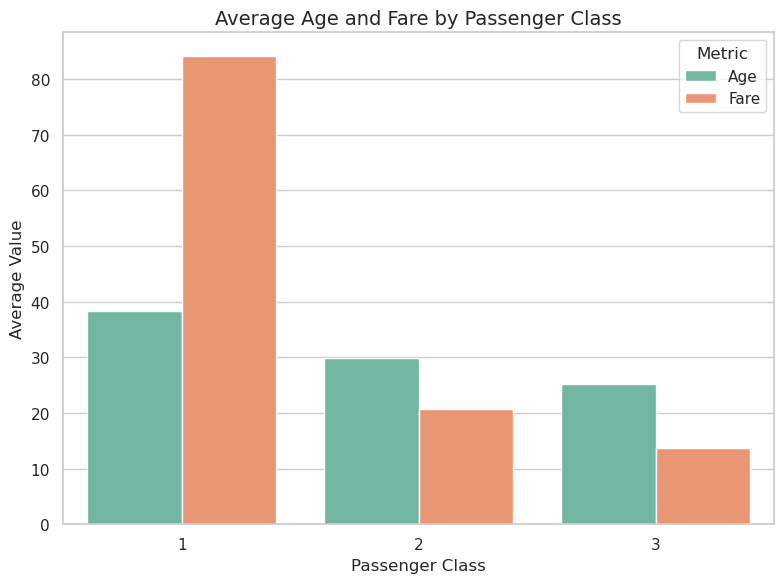

In [31]:
# Bar Chart
class_means = df.groupby('Pclass')[['Age','Fare']].mean().reset_index()
melted = class_means.melt(id_vars='Pclass', var_name='Metric', value_name='Average')

plt.figure(figsize=(8, 6))
sns.barplot(data=melted, x='Pclass', y='Average', hue='Metric', palette='Set2')
plt.title('Average Age and Fare by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

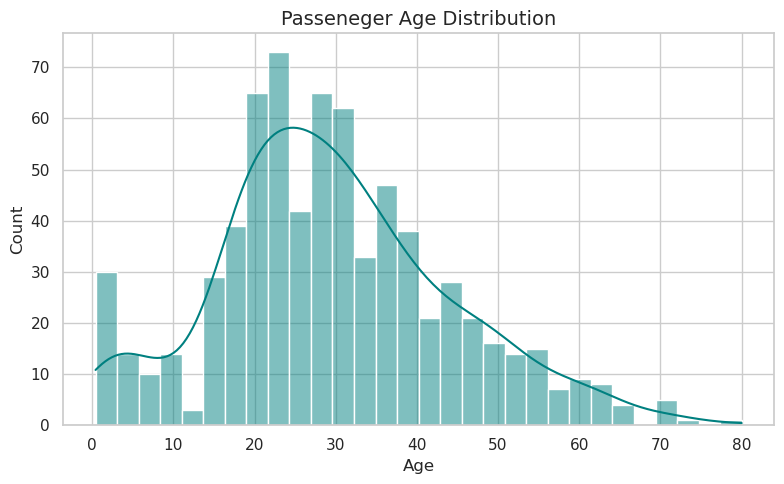

In [29]:
# Histogram

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='teal')
plt.title('Passeneger Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

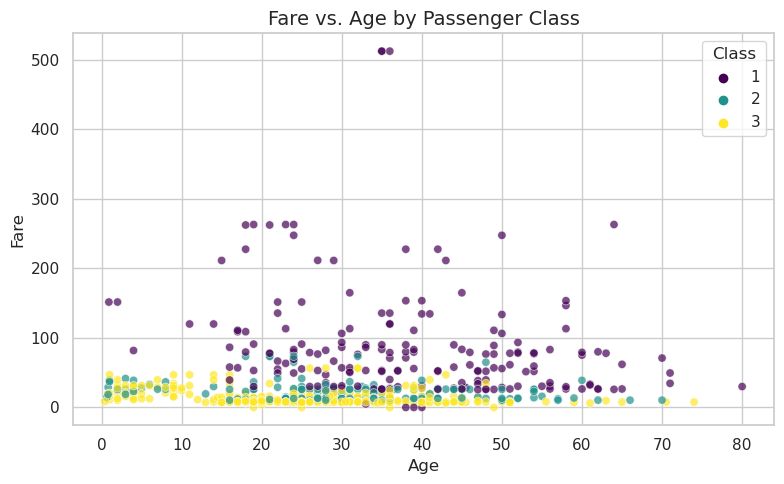

In [32]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass', palette='viridis', alpha=0.7)
plt.title('Fare vs. Age by Passenger Class', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.legend(title='Class')
plt.tight_layout()
plt.show()